In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import tensorflow.compat.v1 as tf

from tensorflow.compat.v1 import keras
from tensorflow.compat.v1.keras import Sequential
from tensorflow.compat.v1.keras.layers import  *
from tensorflow.compat.v1.keras.models import Model
from tensorflow.compat.v1.keras import backend as K

%matplotlib inline

In [3]:
faces = np.load("./fm.npy")

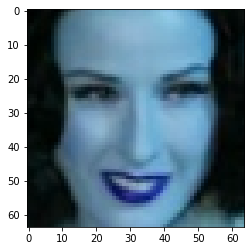

In [4]:
plt.imshow(faces[0])

In [5]:
inputs = Input(shape=(64,64,3))

conv = Conv2D(8,4,activation="relu",input_shape=(64,64,3))(inputs)
conv = Conv2D(16,3,activation="relu",)(conv)
conv = Conv2D(32,2,activation="relu",)(conv)

flat = Flatten()(conv)
dense = Dense(128,activation="relu")(flat)
out = Dense(128)(dense)
embedding = Model(inputs,out)

embedding.compile(optimizer="adam",loss="mae")

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [6]:
embedding.load_weights("./emb.h5")

In [7]:
embedding.predict(faces[0:1])

array([[542.45844, 554.2513 , 590.0593 , 386.1992 , 328.38626, 548.5284 ,
        339.1237 , 370.65857, 496.61957, 483.59418, 378.6893 , 414.49344,
        391.9217 , 345.52213, 365.61   , 464.51355, 421.3132 , 421.56894,
        400.4527 , 471.1735 , 514.53595, 431.86487, 451.95645, 446.80786,
        428.40976, 286.5029 , 548.25806, 367.77646, 331.61407, 490.9471 ,
        622.1934 , 440.03036, 374.36057, 519.3076 , 574.5158 , 437.47525,
        508.03363, 581.0613 , 380.2879 , 417.45468, 361.29272, 466.78177,
        429.01215, 392.1924 , 565.334  , 454.2215 , 579.33044, 430.52762,
        303.59888, 469.23557, 518.02966, 451.79916, 508.20612, 394.11682,
        358.85638, 534.6551 , 379.26846, 440.71588, 481.7832 , 588.2821 ,
        494.5858 , 390.3367 , 573.8404 , 380.10486, 453.25485, 443.14465,
        383.3909 , 346.80573, 473.44266, 370.02756, 355.3526 , 431.4284 ,
        452.02304, 447.21466, 535.70795, 398.4711 , 404.1586 , 448.80334,
        595.24445, 512.2504 , 494.9025

In [11]:
base = embedding.predict(faces[0:1])

In [66]:
class RMSEScore(Layer):

    def __init__(self, base, **kwargs):
        self.base = tf.constant(base)
        super(RMSEScore, self).__init__(**kwargs)

    def build(self, input_shape):
        super(RMSEScore, self).build(input_shape)  

    def call(self, x):
        return K.sqrt(K.mean(K.square(tf.subtract(self.base,x)),axis=1))

    def compute_output_shape(self, input_shape):
        return [1,128]
    
score = RMSEScore(base=base)(out)
scoring = Model(inputs,score)
scoring.predict(faces[0:1])

array([0.], dtype=float32)

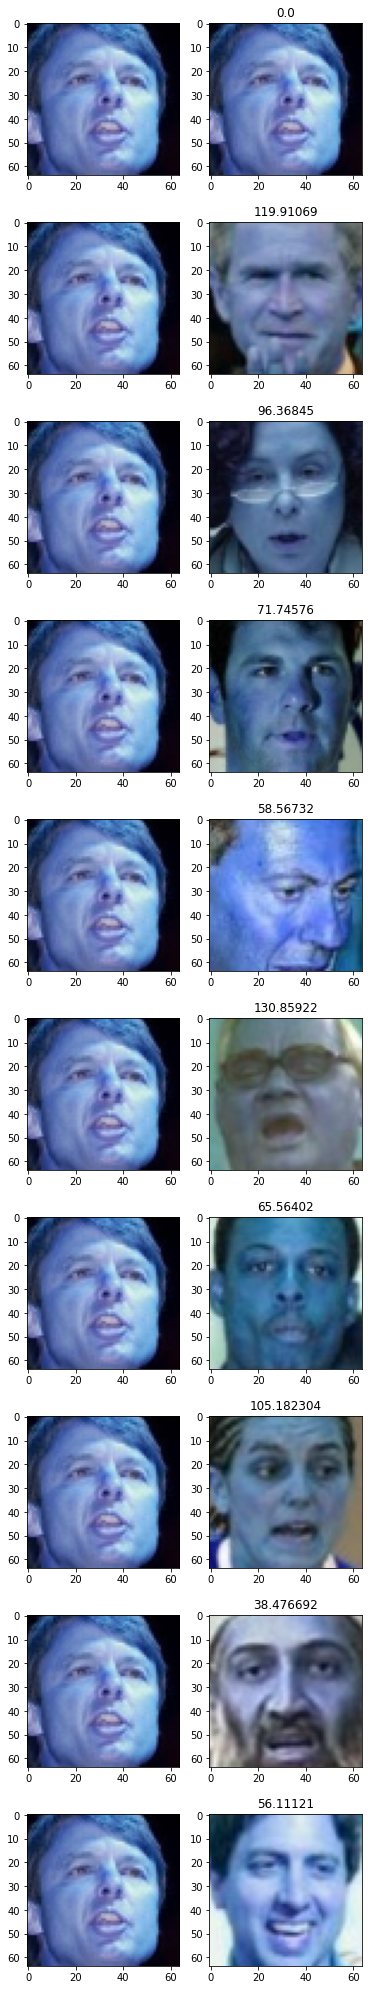

In [68]:
i = 6

fig,axes = plt.subplots(10,2,figsize=(6,36))
base_img = faces[i:i+1]
base = embedding.predict(base_img)
score = RMSEScore(base=base)(out)
scoring = Model(inputs,score)

index = np.random.randint(0,faces.shape[0],9)
axes[0,0].imshow(base_img[0])
axes[0,1].imshow(base_img[0])
axes[0,1].set_title(str(scoring.predict(base_img)[0]))

for i,j in enumerate(index):
    axes[i+1,0].imshow(base_img[0])
    axes[i+1,1].imshow(faces[j])
    axes[i+1,1].set_title(str(scoring.predict(faces[j:j+1])[0]))